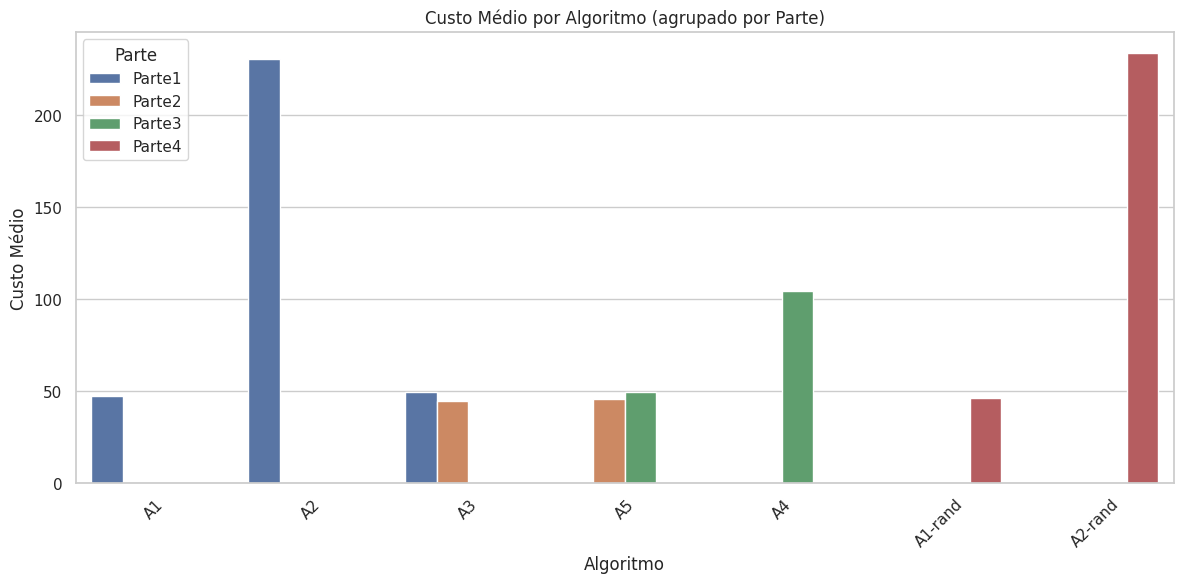

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carregar o CSV com os resultados
df = pd.read_csv('results.csv')
df.head()

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Agrupamento médio por algoritmo
mean_metrics = df.groupby(['Part', 'Algorithm'])[['PathLength', 'Cost', 'NodesGenerated', 'NodesVisited']].mean().reset_index()

# Gráfico 1: Custo médio por algoritmo por parte
plt.figure()
sns.barplot(data=mean_metrics, x='Algorithm', y='Cost', hue='Part')
plt.title('Custo Médio por Algoritmo (agrupado por Parte)')
plt.ylabel('Custo Médio')
plt.xlabel('Algoritmo')
plt.legend(title='Parte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


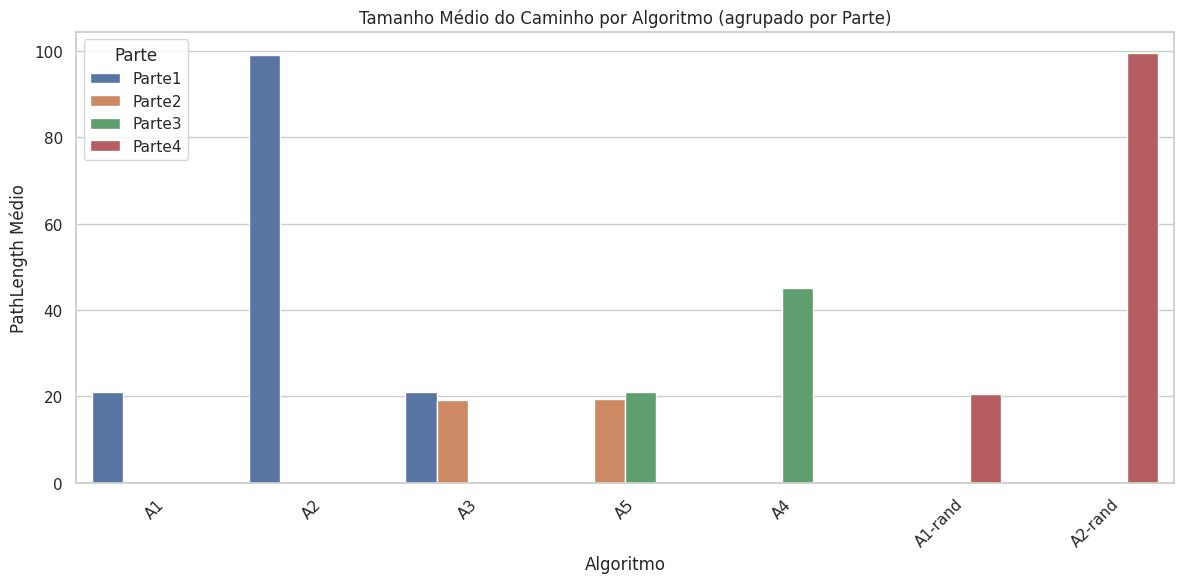

In [7]:
# Gráfico 2: Tamanho médio do caminho (PathLength) por algoritmo
plt.figure()
sns.barplot(data=mean_metrics, x='Algorithm', y='PathLength', hue='Part')
plt.title('Tamanho Médio do Caminho por Algoritmo (agrupado por Parte)')
plt.ylabel('PathLength Médio')
plt.xlabel('Algoritmo')
plt.legend(title='Parte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

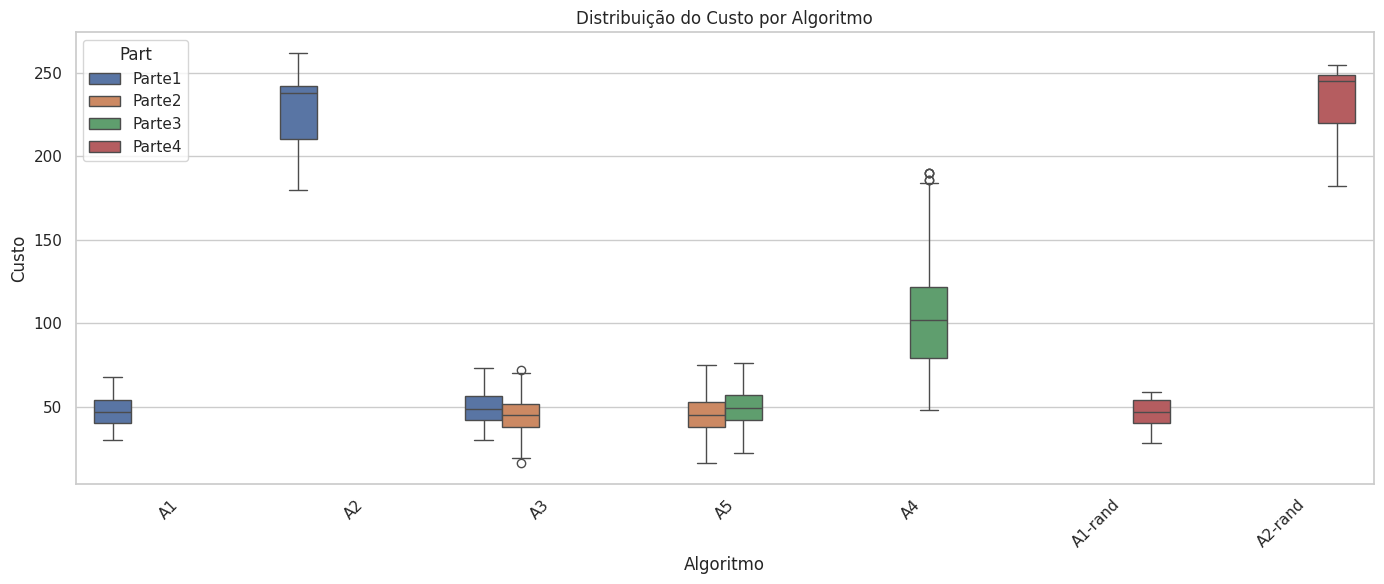

In [9]:
# Gráfico 4: Boxplot do custo por algoritmo (todas as execuções)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Algorithm', y='Cost', hue='Part')
plt.title('Distribuição do Custo por Algoritmo')
plt.ylabel('Custo')
plt.xlabel('Algoritmo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

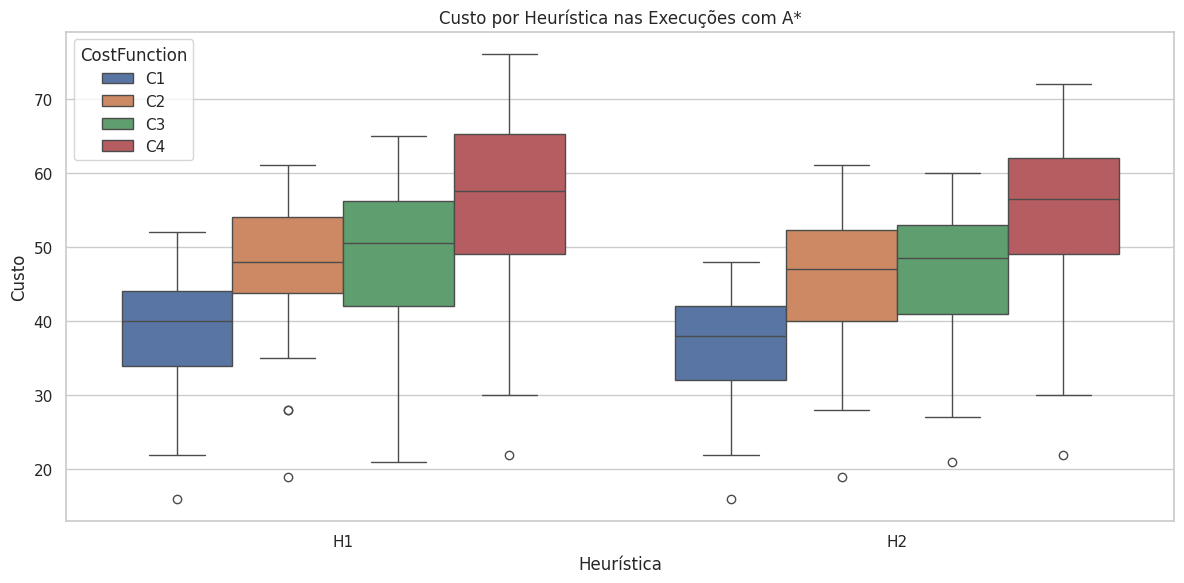

In [10]:
# Gráfico 5: Comparação de heurísticas em A*
a_star_df = df[(df['Algorithm'] == 'A5') & (df['Heuristic'] != 'None')]
plt.figure(figsize=(12, 6))
sns.boxplot(data=a_star_df, x='Heuristic', y='Cost', hue='CostFunction')
plt.title('Custo por Heurística nas Execuções com A*')
plt.xlabel('Heurística')
plt.ylabel('Custo')
plt.tight_layout()
plt.show()